# NYC 311 Complaints: Composting in 2025

In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
%%R 

library(tidycensus)
library(tidyverse)

options(tigris_use_cache = TRUE)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [5]:
import requests

In [6]:
import time

In [7]:
base_url = "https://data.cityofnewyork.us/resource/erm2-nwe9.json"
limit = 1000
offset = 0
all_results = []

while True:
    query = {
        "$q": "compost",  # Full-text search for compost
        "$order": "created_date DESC",
        "$limit": limit,
        "$offset": offset
    }

    response = requests.get(base_url, params=query)

    if response.status_code != 200:
        print(f"Request failed with status code {response.status_code}")
        break

    data = response.json()

    if not data:
        print("No more data to fetch.")
        break

    all_results.extend(data)
    print(f"Fetched {len(data)} records; total so far: {len(all_results)}")

    offset += limit
    time.sleep(1)  # Optional: Pause to avoid rate limits

print(f"Total compost-related records fetched: {len(all_results)}")

Fetched 1000 records; total so far: 1000
Fetched 1000 records; total so far: 2000
Fetched 1000 records; total so far: 3000
Fetched 1000 records; total so far: 4000
Fetched 1000 records; total so far: 5000
Fetched 1000 records; total so far: 6000
Fetched 1000 records; total so far: 7000
Fetched 1000 records; total so far: 8000
Fetched 1000 records; total so far: 9000
Fetched 1000 records; total so far: 10000
Fetched 1000 records; total so far: 11000
Fetched 1000 records; total so far: 12000
Fetched 1000 records; total so far: 13000
Fetched 1000 records; total so far: 14000
Fetched 1000 records; total so far: 15000
Fetched 1000 records; total so far: 16000
Fetched 1000 records; total so far: 17000
Fetched 1000 records; total so far: 18000
Fetched 1000 records; total so far: 19000
Fetched 1000 records; total so far: 20000
Fetched 1000 records; total so far: 21000
Fetched 1000 records; total so far: 22000
Fetched 67 records; total so far: 22067
No more data to fetch.
Total compost-related 

In [8]:
df = pd.DataFrame(all_results)

In [9]:
df.head()

,unique_key,created_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,...,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,resolution_description,resolution_action_updated_date,closed_date,facility_type
0,65267374,2025-06-15T01:18:52.000,DSNY,Department of Sanitation,Missed Collection,Compost,Street,10309,202 ADMIRALTY LOOP,ADMIRALTY LOOP,...,ONLINE,Unspecified,STATEN ISLAND,40.515918339918166,-74.20303101145603,"{'latitude': '40.515918339918166', 'longitude'...",NaN,NaN,NaN,NaN
1,65262952,2025-06-14T23:34:49.000,DSNY,Department of Sanitation,Missed Collection,Compost,Street,11226,3009 CORTELYOU ROAD,CORTELYOU ROAD,...,ONLINE,Unspecified,BROOKLYN,40.644441635858456,-73.9486868826923,"{'latitude': '40.644441635858456', 'longitude'...",NaN,NaN,NaN,NaN
2,65268421,2025-06-14T20:44:20.000,DSNY,Department of Sanitation,Missed Collection,Compost,Street,10016,252 EAST 32 STREET,EAST 32 STREET,...,ONLINE,Unspecified,MANHATTAN,40.743578092381746,-73.97702991799225,"{'latitude': '40.743578092381746', 'longitude'...",NaN,NaN,NaN,NaN
3,65267381,2025-06-14T19:43:09.000,DSNY,Department of Sanitation,Missed Collection,Compost,Street,11236,1036 RALPH AVENUE,RALPH AVENUE,...,PHONE,Unspecified,BROOKLYN,40.64984929808265,-73.92049785644882,"{'latitude': '40.64984929808265', 'longitude':...",NaN,NaN,NaN,NaN
4,65268418,2025-06-14T19:39:08.000,DSNY,Department of Sanitation,Missed Collection,Compost,Street,11235,2830 BRIGHTON 3 STREET,BRIGHTON 3 STREET,...,ONLINE,Unspecified,BROOKLYN,40.582316782730686,-73.9655866710303,"{'latitude': '40.582316782730686', 'longitude'...",NaN,NaN,NaN,NaN


In [10]:
df.shape

(22067, 33)

In [11]:
df['created_year'] = df['created_date'].str.extract(r'(\d{4})')

In [12]:
pd.set_option('display.max_columns', None)

In [13]:
df.head()

,unique_key,created_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,status,community_board,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,resolution_description,resolution_action_updated_date,closed_date,facility_type,created_year
0,65267374,2025-06-15T01:18:52.000,DSNY,Department of Sanitation,Missed Collection,Compost,Street,10309,202 ADMIRALTY LOOP,ADMIRALTY LOOP,BEND,DEAD END,BEND,DEAD END,ADDRESS,STATEN ISLAND,ADMIRALTY LOOP,In Progress,03 STATEN ISLAND,5067270065,STATEN ISLAND,927798,127305,ONLINE,Unspecified,STATEN ISLAND,40.515918339918166,-74.20303101145603,"{'latitude': '40.515918339918166', 'longitude'...",NaN,NaN,NaN,NaN,2025
1,65262952,2025-06-14T23:34:49.000,DSNY,Department of Sanitation,Missed Collection,Compost,Street,11226,3009 CORTELYOU ROAD,CORTELYOU ROAD,NOSTRAND AVENUE,EAST 31 STREET,NOSTRAND AVENUE,EAST 31 STREET,ADDRESS,BROOKLYN,CORTELYOU ROAD,In Progress,17 BROOKLYN,3049300064,BROOKLYN,998490,174068,ONLINE,Unspecified,BROOKLYN,40.644441635858456,-73.9486868826923,"{'latitude': '40.644441635858456', 'longitude'...",NaN,NaN,NaN,NaN,2025
2,65268421,2025-06-14T20:44:20.000,DSNY,Department of Sanitation,Missed Collection,Compost,Street,10016,252 EAST 32 STREET,EAST 32 STREET,3 AVENUE,2 AVENUE,3 AVENUE,2 AVENUE,ADDRESS,NEW YORK,EAST 32 STREET,In Progress,06 MANHATTAN,1009120038,MANHATTAN,990615,210183,ONLINE,Unspecified,MANHATTAN,40.743578092381746,-73.97702991799225,"{'latitude': '40.743578092381746', 'longitude'...",NaN,NaN,NaN,NaN,2025
3,65267381,2025-06-14T19:43:09.000,DSNY,Department of Sanitation,Missed Collection,Compost,Street,11236,1036 RALPH AVENUE,RALPH AVENUE,EAST 88 STREET,AVENUE A,EAST 88 STREET,AVENUE A,ADDRESS,BROOKLYN,RALPH AVENUE,In Progress,17 BROOKLYN,3047310052,BROOKLYN,1006311,176044,PHONE,Unspecified,BROOKLYN,40.64984929808265,-73.92049785644882,"{'latitude': '40.64984929808265', 'longitude':...",NaN,NaN,NaN,NaN,2025
4,65268418,2025-06-14T19:39:08.000,DSNY,Department of Sanitation,Missed Collection,Compost,Street,11235,2830 BRIGHTON 3 STREET,BRIGHTON 3 STREET,SHORE PARKWAY,BRIGHTON 3 ROAD,SHORE PARKWAY,BRIGHTON 3 ROAD,ADDRESS,BROOKLYN,BRIGHTON 3 STREET,In Progress,13 BROOKLYN,3072607505,BROOKLYN,993809,151432,ONLINE,Unspecified,BROOKLYN,40.582316782730686,-73.9655866710303,"{'latitude': '40.582316782730686', 'longitude'...",NaN,NaN,NaN,NaN,2025


In [14]:
df['created_year'].value_counts().sort_index()

created_year
2010     690
2011     666
2012     546
2013     571
2014     390
2015     136
2016      28
2017      41
2018      12
2019       9
2022    3318
2023    5064
2024    4685
2025    5911
Name: count, dtype: int64

In [15]:
df['complaint_type'].value_counts()

complaint_type
Missed Collection                 18976
Literature Request                 3089
Residential Disposal Complaint        2
Name: count, dtype: int64

In [16]:
df.groupby('borough').size().sort_values(ascending=False)

borough
BROOKLYN         11025
QUEENS            5498
MANHATTAN         2641
BRONX             1852
STATEN ISLAND     1032
Unspecified         19
dtype: int64

In [17]:
df[df['created_year'] == '2025'].groupby('borough').size().sort_values(ascending=False)

borough
BROOKLYN         2158
QUEENS           1431
BRONX             908
MANHATTAN         813
STATEN ISLAND     601
dtype: int64

In [18]:
df.groupby('borough')['complaint_type'].value_counts()

borough        complaint_type                
BRONX          Missed Collection                 1515
               Literature Request                 337
BROOKLYN       Missed Collection                 9851
               Literature Request                1174
MANHATTAN      Missed Collection                 2313
               Literature Request                 327
               Residential Disposal Complaint       1
QUEENS         Missed Collection                 4546
               Literature Request                 951
               Residential Disposal Complaint       1
STATEN ISLAND  Missed Collection                  743
               Literature Request                 289
Unspecified    Literature Request                  11
               Missed Collection                    8
Name: count, dtype: int64

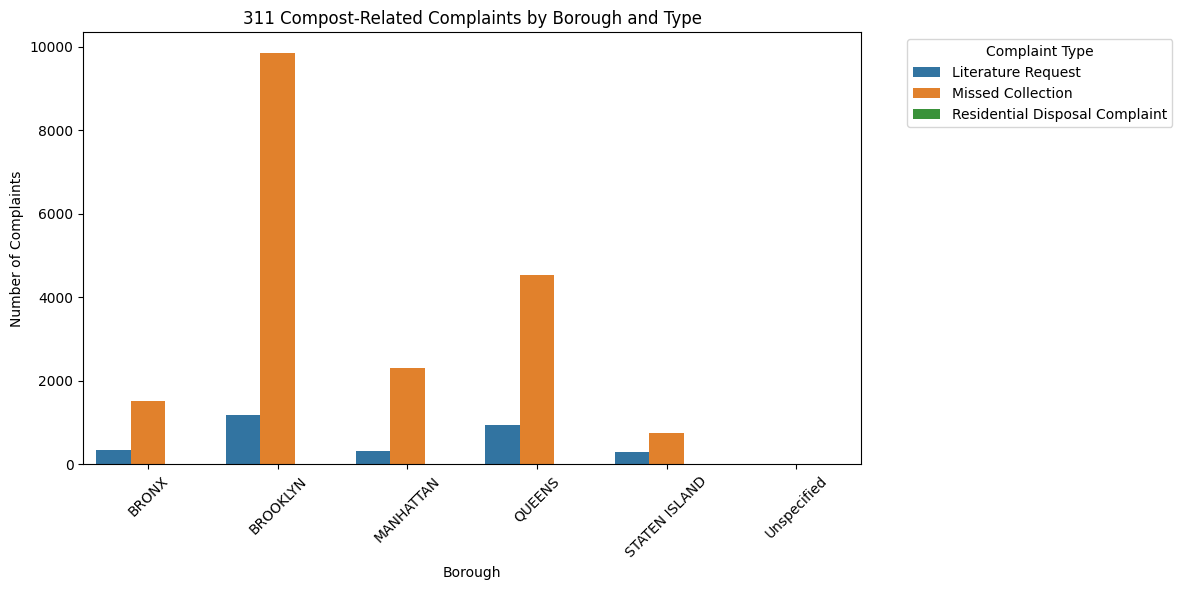

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by borough and complaint_type, then count
grouped = df.groupby(['borough', 'complaint_type']).size().reset_index(name='count')

# Plot with seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='borough', y='count', hue='complaint_type')

plt.title("311 Compost-Related Complaints by Borough and Type")
plt.xlabel("Borough")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=45)
plt.legend(title="Complaint Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

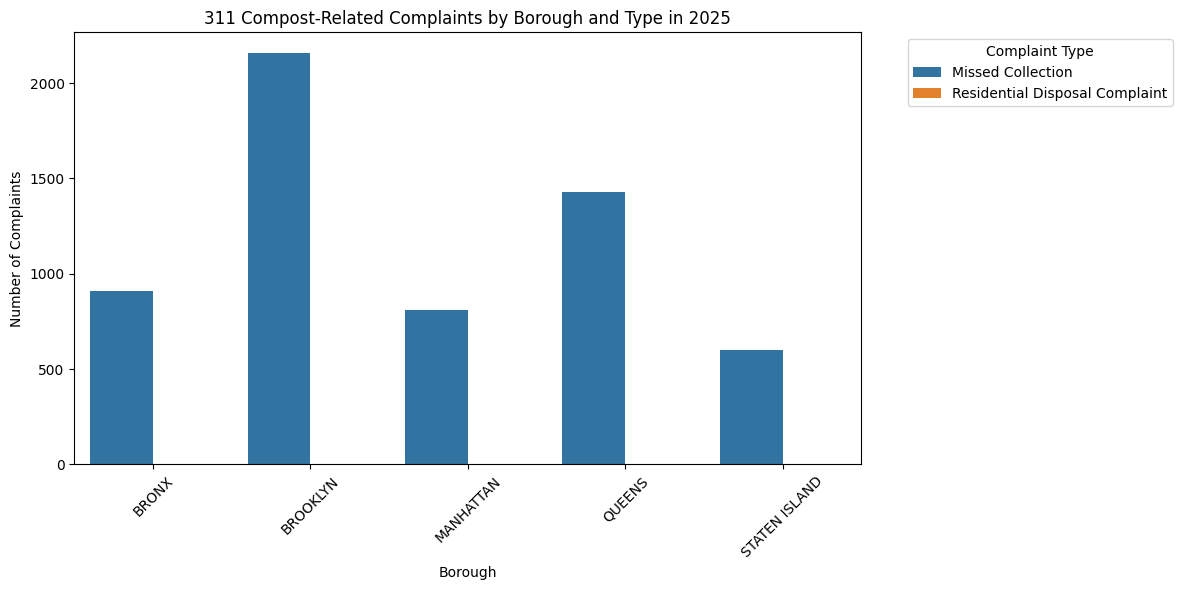

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by borough and complaint_type, then count
grouped = df[df['created_year'] == '2025'].groupby(['borough', 'complaint_type']).size().reset_index(name='count')

# Plot with seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='borough', y='count', hue='complaint_type')

plt.title("311 Compost-Related Complaints by Borough and Type in 2025")
plt.xlabel("Borough")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=45)
plt.legend(title="Complaint Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [21]:
pd.set_option('display.max_rows', None)

In [22]:
df.groupby(['borough','created_year']).size().reset_index()

,borough,created_year,0
0,BRONX,2010,74
1,BRONX,2011,58
2,BRONX,2012,62
3,BRONX,2013,64
4,BRONX,2014,38
5,BRONX,2015,31
6,BRONX,2016,1
7,BRONX,2017,4
8,BRONX,2018,2
9,BRONX,2019,3


In [23]:
import matplotlib.pyplot as plt

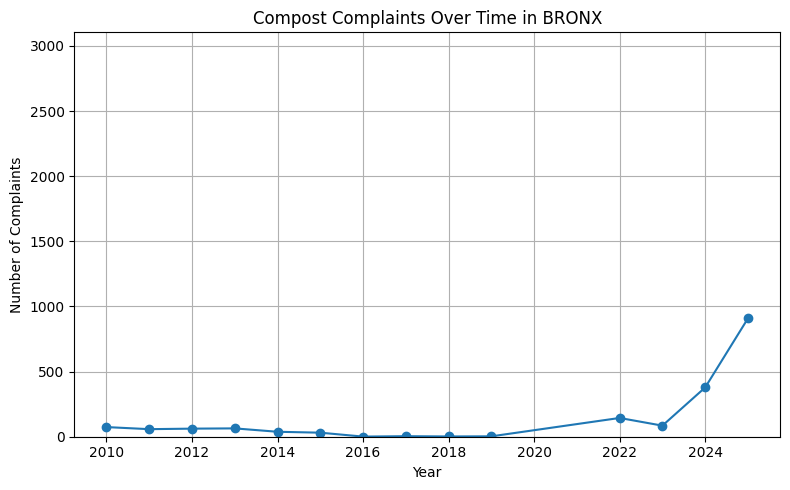

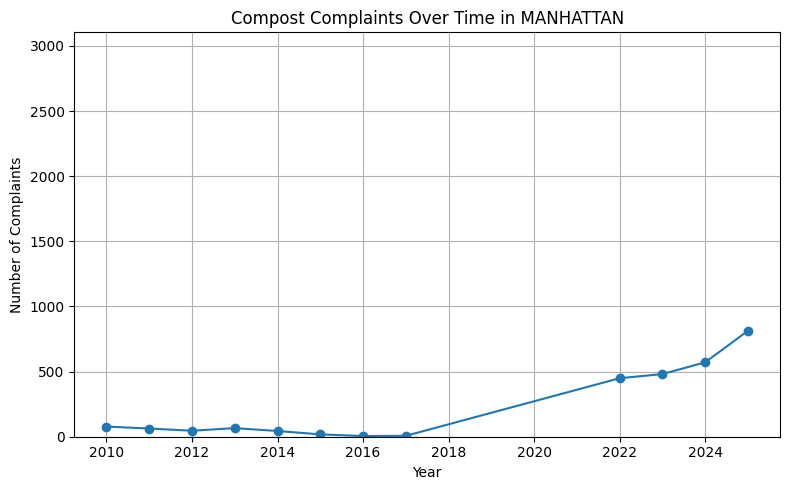

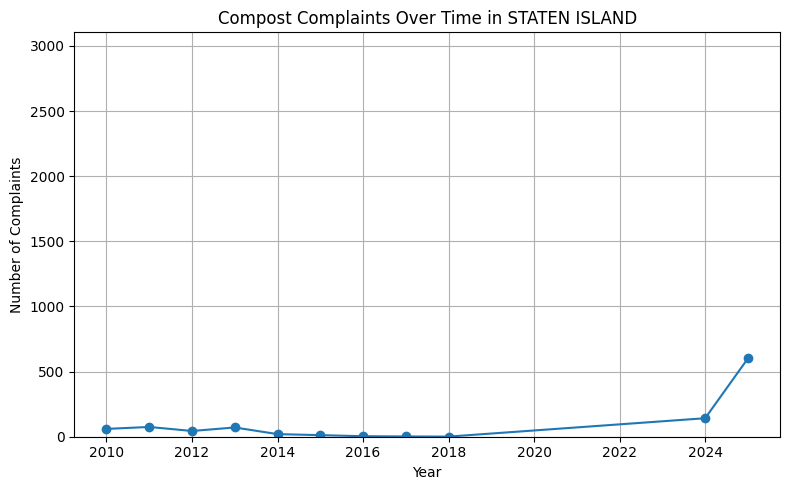

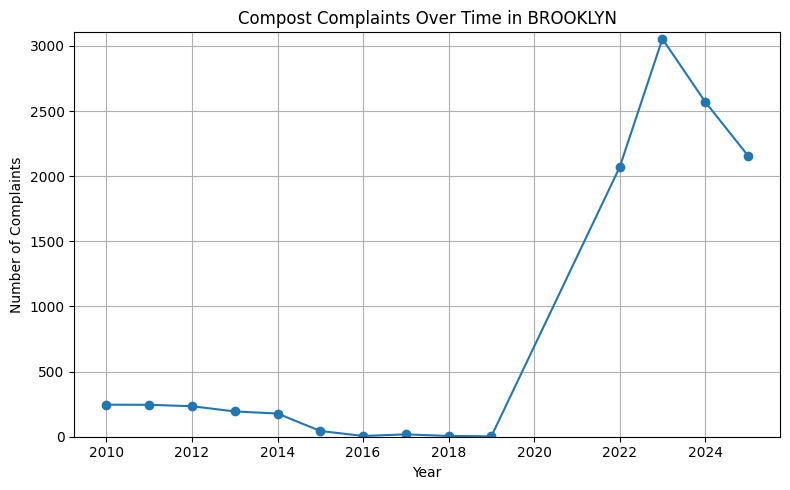

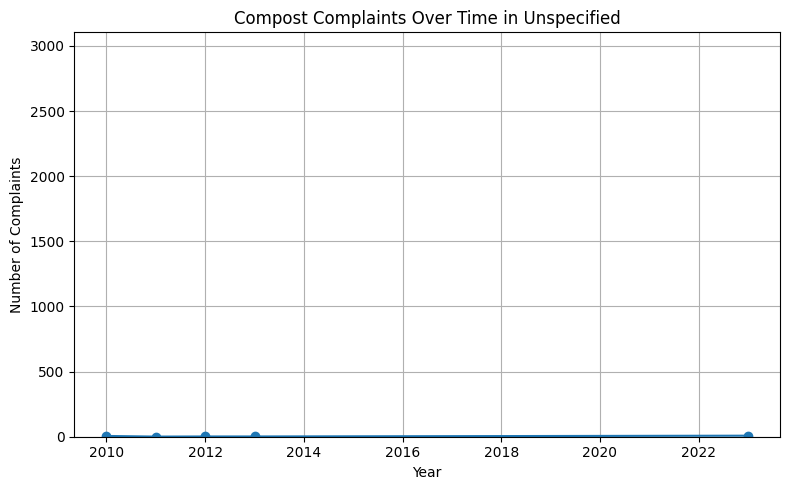

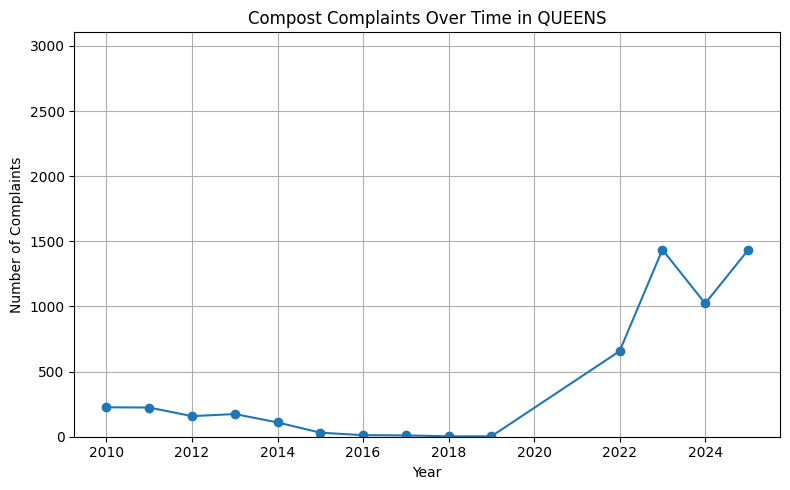

In [24]:
# Make sure 'grouped' has the correct structure
grouped = df.groupby(['borough', 'created_year']).size().reset_index(name='count')

# Get max count to standardize y-axis
max_count = grouped['count'].max()

# Optional: sort years numerically for proper plotting
grouped['created_year'] = grouped['created_year'].astype(int)
grouped = grouped.sort_values('created_year')

for borough in grouped['borough'].dropna().unique():
    borough_data = grouped[grouped['borough'] == borough]

    plt.figure(figsize=(8, 5))
    plt.plot(borough_data['created_year'], borough_data['count'], marker='o')
    plt.title(f"Compost Complaints Over Time in {borough}")
    plt.xlabel("Year")
    plt.ylabel("Number of Complaints")
    plt.ylim(0, max_count + 50)  # Keep all plots on the same scale
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [25]:
# # Group by incident_zip and created_year
# grouped = df.groupby(['incident_zip', 'created_year']).size().reset_index(name='count')

# # Convert year to int and sort for proper plotting
# grouped['created_year'] = grouped['created_year'].astype(int)
# grouped = grouped.sort_values('created_year')

# # Get max count to standardize y-axis across all plots
# max_count = grouped['count'].max()

# # Loop through unique ZIP codes and plot smaller charts
# for zip_code in grouped['incident_zip'].dropna().unique():
#     zip_data = grouped[grouped['incident_zip'] == zip_code]

#     plt.figure(figsize=(6, 4))  # Smaller figure size
#     plt.plot(zip_data['created_year'], zip_data['count'], marker='o')
#     plt.title(f"Compost Complaints in ZIP {zip_code}")
#     plt.xlabel("Year")
#     plt.ylabel("Number of Complaints")
#     plt.ylim(0, max_count + 10)  # Consistent y-axis, slight padding
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

In [26]:
df.to_csv('compost_complaints.csv', index=False)

In [27]:
%%R

df <- read.csv('compost_complaints.csv')

In [28]:
%%R

head(df)

  unique_key            created_date agency              agency_name
1   65267374 2025-06-15T01:18:52.000   DSNY Department of Sanitation
2   65262952 2025-06-14T23:34:49.000   DSNY Department of Sanitation
3   65268421 2025-06-14T20:44:20.000   DSNY Department of Sanitation
4   65267381 2025-06-14T19:43:09.000   DSNY Department of Sanitation
5   65268418 2025-06-14T19:39:08.000   DSNY Department of Sanitation
6   65264040 2025-06-14T18:52:19.000   DSNY Department of Sanitation
     complaint_type descriptor location_type incident_zip
1 Missed Collection    Compost        Street        10309
2 Missed Collection    Compost        Street        11226
3 Missed Collection    Compost        Street        10016
4 Missed Collection    Compost        Street        11236
5 Missed Collection    Compost        Street        11235
6 Missed Collection    Compost        Street        10016
           incident_address          street_name   cross_street_1
1        202 ADMIRALTY LOOP       ADMIRALTY L

In [35]:
%%R

df$created_date <- as.Date(df$created_date)

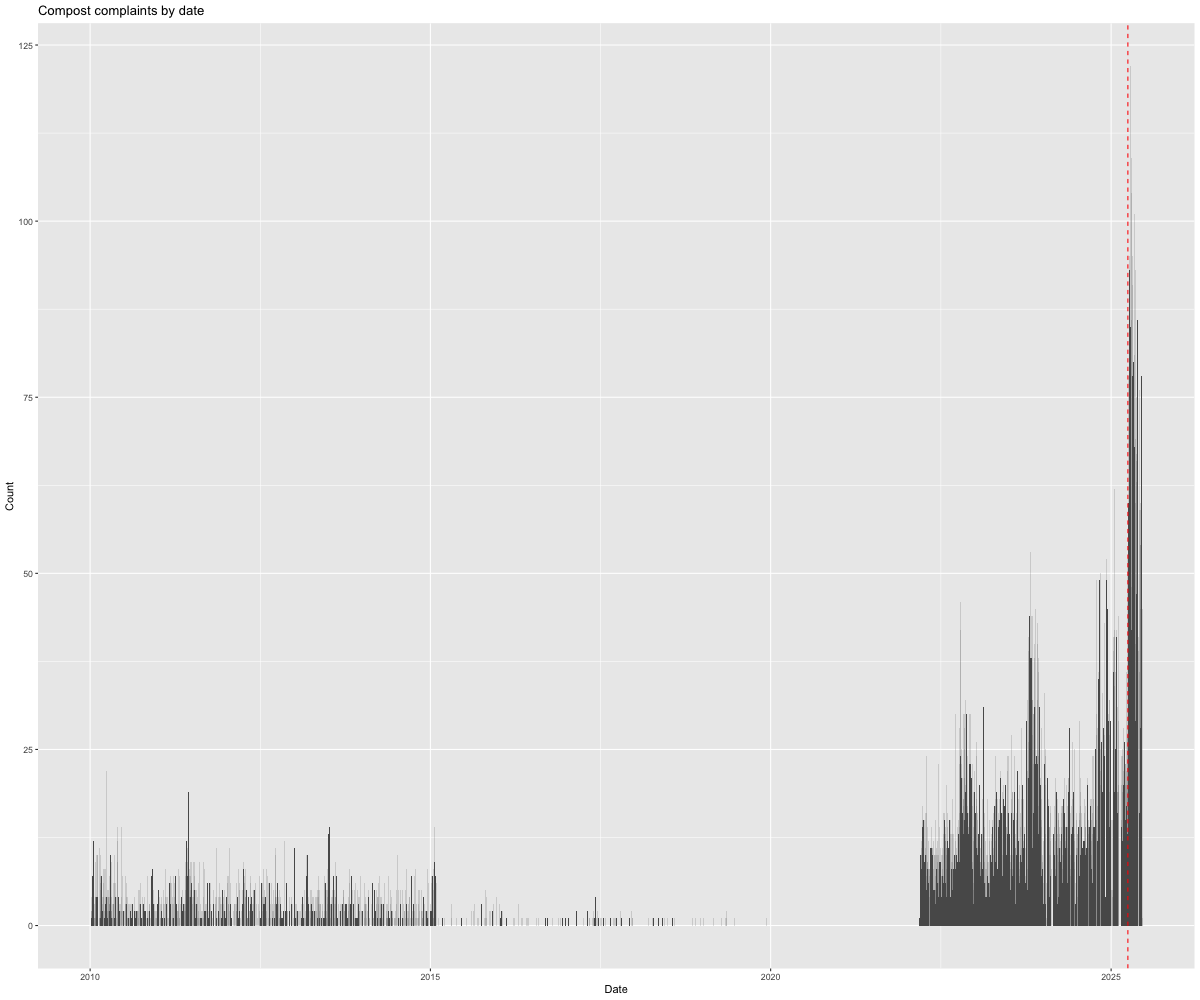

In [39]:
%%R -h 1000 -w 1200

ggplot(df) +
  aes(x = as.Date(created_date)) + 
  geom_histogram(binwidth = 1) +
  labs(title = "Compost complaints by date", x = "Date", y = "Count") +
  geom_vline(xintercept = as.Date("2025-04-01"), linetype = "dashed", color = "red") +
  annotate("text", x = as.Date("2025-04-01"), y = Inf, label = "April 2025", vjust = -0.5, color = "red")

### There is a huge spike in complaints after April 1, 2025

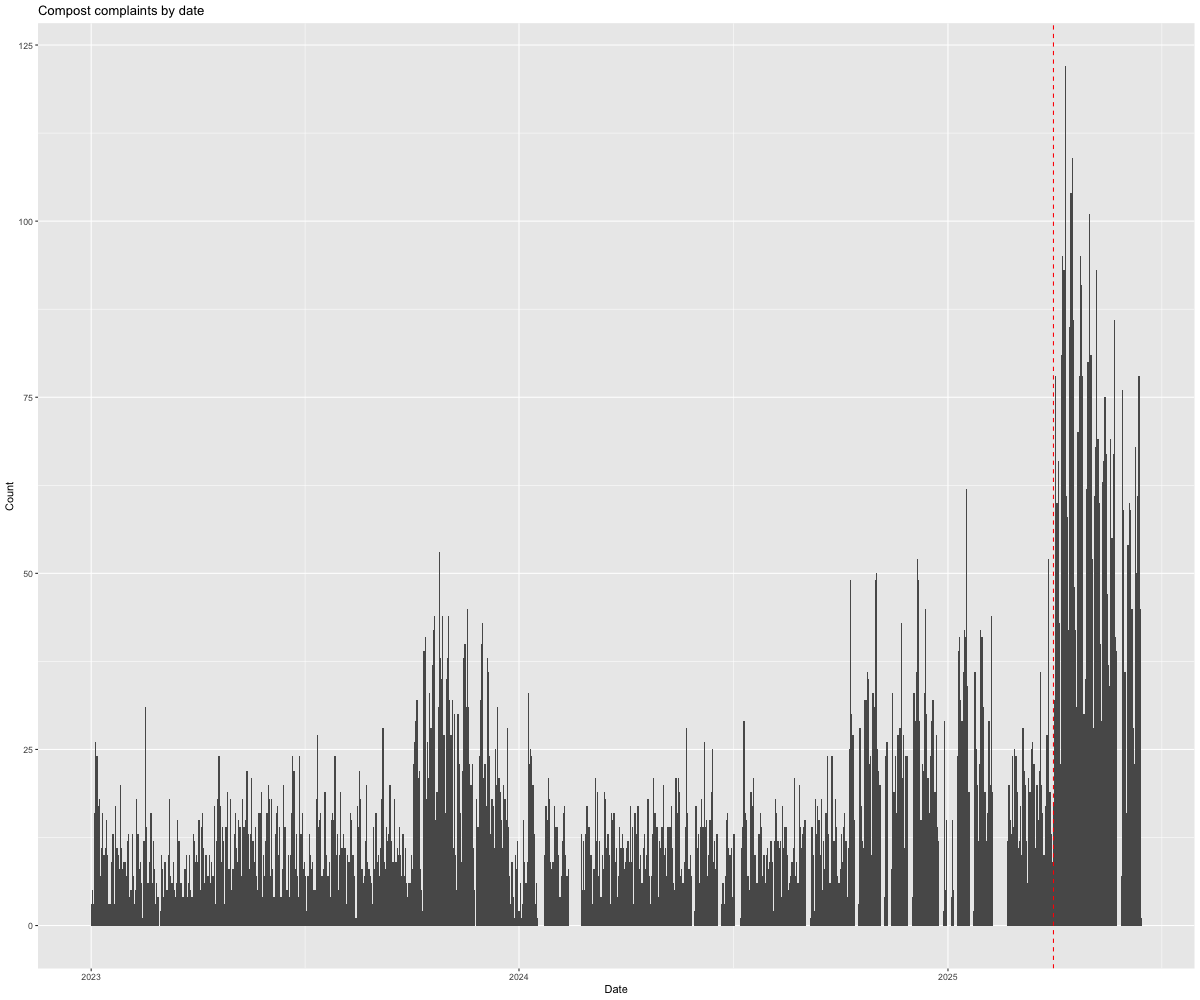

In [41]:
%%R -w 1200 -h 1000

df_filtered <- df[df$created_date > as.Date("2022-12-31"), ]

ggplot(df_filtered) +
  aes(x = as.Date(created_date)) + 
  geom_histogram(binwidth = 1) +
  labs(title = "Compost complaints by date", x = "Date", y = "Count") +
  geom_vline(xintercept = as.Date("2025-04-01"), linetype = "dashed", color = "red") +
  annotate("text", x = as.Date("2025-04-01"), y = Inf, label = "April 2025", vjust = -0.5, color = "red")

## Bronx complaints only after 2022

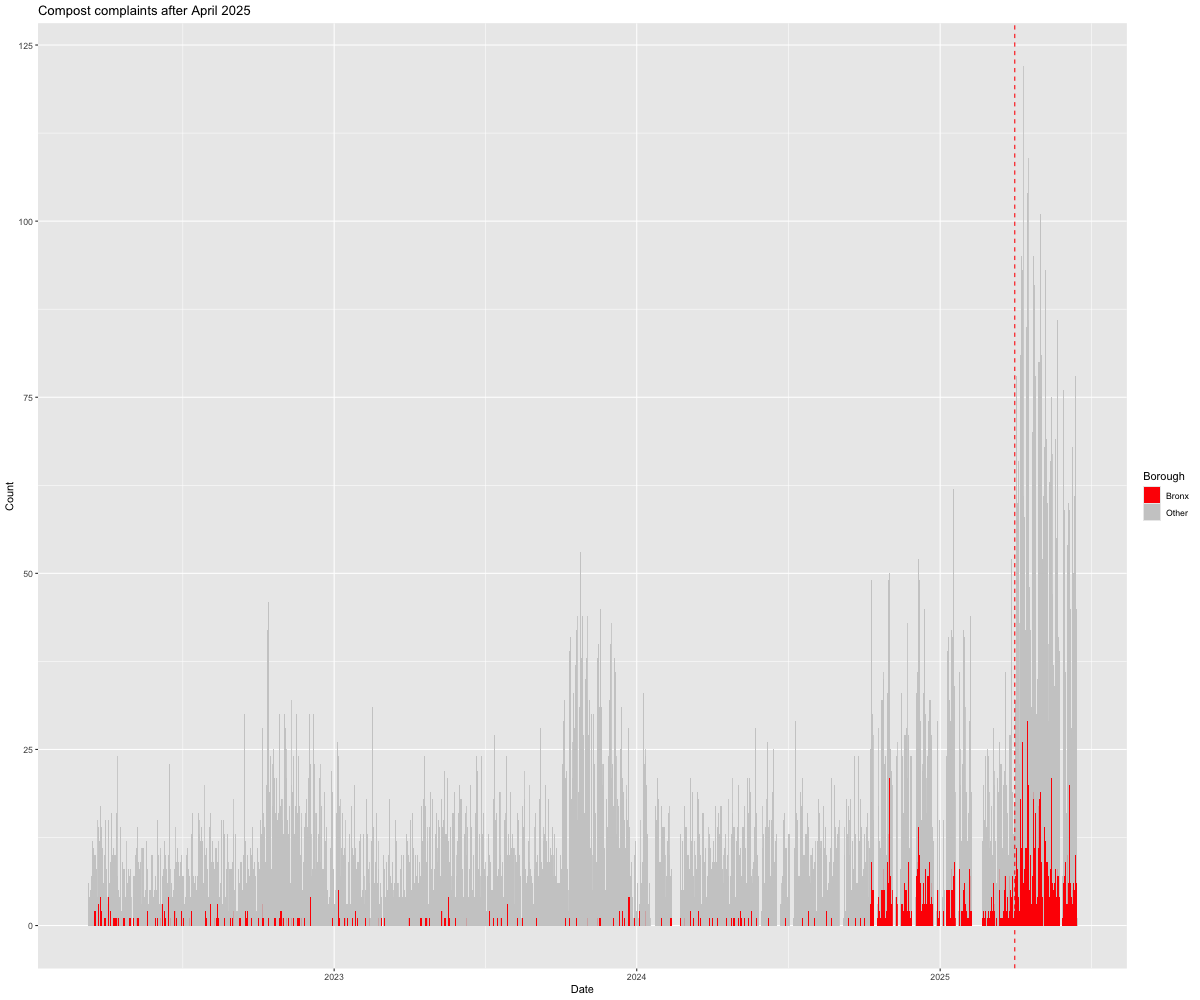

In [48]:
%%R -w 1200 -h 1000

df_filtered <- df[df$created_date > as.Date("2022-01-01"), ]

df_filtered$in_bronx <- ifelse(df_filtered$borough == "BRONX", "Bronx", "Other")

ggplot(df_filtered) +
  aes(x = as.Date(created_date), fill = in_bronx) + 
  geom_histogram(binwidth = 1, position = position_stack(reverse = TRUE)) +
  labs(title = "Compost complaints after April 2025", 
       x = "Date", y = "Count", fill = "Borough") +
  geom_vline(xintercept = as.Date("2025-04-01"), linetype = "dashed", color = "red") +
  annotate("text", x = as.Date("2025-04-01"), y = Inf, 
           label = "April 2025", vjust = -0.5, color = "red") +
  scale_fill_manual(values = c("Bronx" = "red", "Other" = "grey80"))

### Bronx complaints spiked in 2024 when the program was rolled out, and again after the fines were levied, but have decreased in the months since though still remaining high

## Staten Island complaints only after 2022

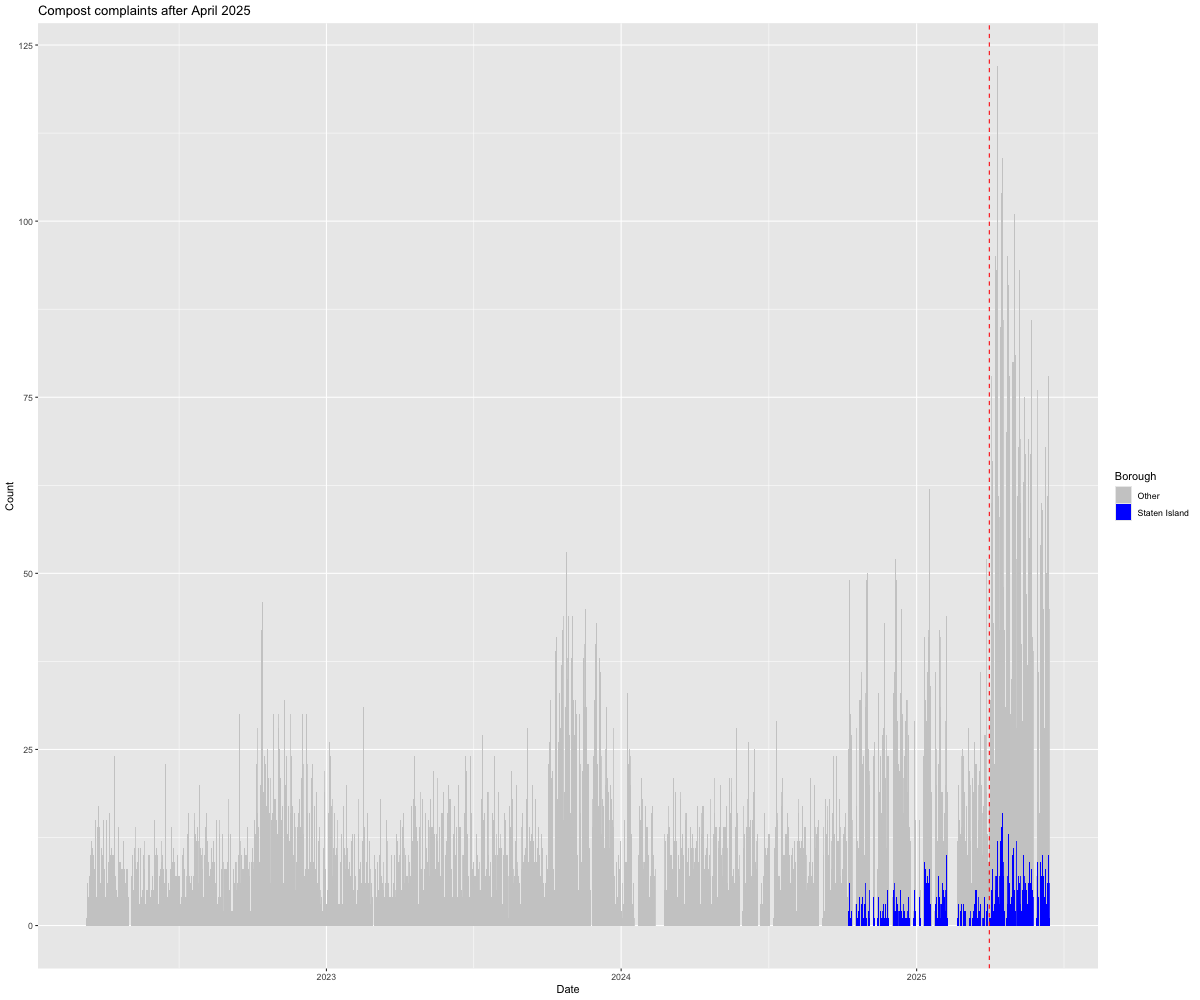

In [47]:
%%R -w 1200 -h 1000

df_filtered <- df[df$created_date > as.Date("2022-01-01"), ]

df_filtered$highlight_si <- ifelse(df_filtered$borough == "STATEN ISLAND", "Staten Island", "Other")

ggplot(df_filtered) +
  aes(x = as.Date(created_date), fill = highlight_si) + 
  geom_histogram(binwidth = 1, position = "stack") +
  labs(
    title = "Compost complaints after April 2025",
    x = "Date", y = "Count", fill = "Borough"
  ) +
  geom_vline(xintercept = as.Date("2025-04-01"), linetype = "dashed", color = "red") +
  annotate("text", x = as.Date("2025-04-01"), y = Inf, 
           label = "April 2025", vjust = -0.5, color = "red") +
  scale_fill_manual(values = c("Staten Island" = "blue", "Other" = "grey80"))

### Staten Island complaints also spiked after fines were introduced, and have decreased slightly, but more leveled out with continuing complaints

## Reading in zip code population data from the US Census (ACS 2023 5-year survey)

In [28]:
pop = pd.read_csv('acs2023_5yr_B01003_86000US10010.csv')

In [29]:
pop.head()

,geoid,name,B01003001,"B01003001, Error"
0,16000US3651000,"New York, NY",8516202,NaN
1,86000US07002,07002,70468,48.0
2,86000US07008,07008,25220,91.0
3,86000US07020,07020,14544,21.0
4,86000US07024,07024,39785,63.0


## Merging in zip code population data with 311 compost data

In [141]:
compost_pop = df.merge(pop, left_on='incident_zip', right_on='name', how='left')

In [142]:
compost_pop.head()

,unique_key,created_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,status,community_board,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,resolution_description,resolution_action_updated_date,closed_date,facility_type,created_year,geoid,name,B01003001,"B01003001, Error"
0,65267374,2025-06-15T01:18:52.000,DSNY,Department of Sanitation,Missed Collection,Compost,Street,10309,202 ADMIRALTY LOOP,ADMIRALTY LOOP,BEND,DEAD END,BEND,DEAD END,ADDRESS,STATEN ISLAND,ADMIRALTY LOOP,In Progress,03 STATEN ISLAND,5067270065,STATEN ISLAND,927798,127305,ONLINE,Unspecified,STATEN ISLAND,40.515918339918166,-74.20303101145603,"{'latitude': '40.515918339918166', 'longitude'...",NaN,NaN,NaN,NaN,2025,86000US10309,10309,34918.0,2185.0
1,65262952,2025-06-14T23:34:49.000,DSNY,Department of Sanitation,Missed Collection,Compost,Street,11226,3009 CORTELYOU ROAD,CORTELYOU ROAD,NOSTRAND AVENUE,EAST 31 STREET,NOSTRAND AVENUE,EAST 31 STREET,ADDRESS,BROOKLYN,CORTELYOU ROAD,In Progress,17 BROOKLYN,3049300064,BROOKLYN,998490,174068,ONLINE,Unspecified,BROOKLYN,40.644441635858456,-73.9486868826923,"{'latitude': '40.644441635858456', 'longitude'...",NaN,NaN,NaN,NaN,2025,86000US11226,11226,100022.0,4535.0
2,65268421,2025-06-14T20:44:20.000,DSNY,Department of Sanitation,Missed Collection,Compost,Street,10016,252 EAST 32 STREET,EAST 32 STREET,3 AVENUE,2 AVENUE,3 AVENUE,2 AVENUE,ADDRESS,NEW YORK,EAST 32 STREET,In Progress,06 MANHATTAN,1009120038,MANHATTAN,990615,210183,ONLINE,Unspecified,MANHATTAN,40.743578092381746,-73.97702991799225,"{'latitude': '40.743578092381746', 'longitude'...",NaN,NaN,NaN,NaN,2025,86000US10016,10016,54297.0,2935.0
3,65267381,2025-06-14T19:43:09.000,DSNY,Department of Sanitation,Missed Collection,Compost,Street,11236,1036 RALPH AVENUE,RALPH AVENUE,EAST 88 STREET,AVENUE A,EAST 88 STREET,AVENUE A,ADDRESS,BROOKLYN,RALPH AVENUE,In Progress,17 BROOKLYN,3047310052,BROOKLYN,1006311,176044,PHONE,Unspecified,BROOKLYN,40.64984929808265,-73.92049785644882,"{'latitude': '40.64984929808265', 'longitude':...",NaN,NaN,NaN,NaN,2025,86000US11236,11236,95174.0,3318.0
4,65268418,2025-06-14T19:39:08.000,DSNY,Department of Sanitation,Missed Collection,Compost,Street,11235,2830 BRIGHTON 3 STREET,BRIGHTON 3 STREET,SHORE PARKWAY,BRIGHTON 3 ROAD,SHORE PARKWAY,BRIGHTON 3 ROAD,ADDRESS,BROOKLYN,BRIGHTON 3 STREET,In Progress,13 BROOKLYN,3072607505,BROOKLYN,993809,151432,ONLINE,Unspecified,BROOKLYN,40.582316782730686,-73.9655866710303,"{'latitude': '40.582316782730686', 'longitude'...",NaN,NaN,NaN,NaN,2025,86000US11235,11235,81958.0,2730.0


In [143]:
compost_pop['population'] = compost_pop['B01003001']

In [144]:
compost_pop = compost_pop.drop(columns={'B01003001','B01003001, Error'})

In [145]:
compost_pop.head()

,unique_key,created_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,status,community_board,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,resolution_description,resolution_action_updated_date,closed_date,facility_type,created_year,geoid,name,population
0,65267374,2025-06-15T01:18:52.000,DSNY,Department of Sanitation,Missed Collection,Compost,Street,10309,202 ADMIRALTY LOOP,ADMIRALTY LOOP,BEND,DEAD END,BEND,DEAD END,ADDRESS,STATEN ISLAND,ADMIRALTY LOOP,In Progress,03 STATEN ISLAND,5067270065,STATEN ISLAND,927798,127305,ONLINE,Unspecified,STATEN ISLAND,40.515918339918166,-74.20303101145603,"{'latitude': '40.515918339918166', 'longitude'...",NaN,NaN,NaN,NaN,2025,86000US10309,10309,34918.0
1,65262952,2025-06-14T23:34:49.000,DSNY,Department of Sanitation,Missed Collection,Compost,Street,11226,3009 CORTELYOU ROAD,CORTELYOU ROAD,NOSTRAND AVENUE,EAST 31 STREET,NOSTRAND AVENUE,EAST 31 STREET,ADDRESS,BROOKLYN,CORTELYOU ROAD,In Progress,17 BROOKLYN,3049300064,BROOKLYN,998490,174068,ONLINE,Unspecified,BROOKLYN,40.644441635858456,-73.9486868826923,"{'latitude': '40.644441635858456', 'longitude'...",NaN,NaN,NaN,NaN,2025,86000US11226,11226,100022.0
2,65268421,2025-06-14T20:44:20.000,DSNY,Department of Sanitation,Missed Collection,Compost,Street,10016,252 EAST 32 STREET,EAST 32 STREET,3 AVENUE,2 AVENUE,3 AVENUE,2 AVENUE,ADDRESS,NEW YORK,EAST 32 STREET,In Progress,06 MANHATTAN,1009120038,MANHATTAN,990615,210183,ONLINE,Unspecified,MANHATTAN,40.743578092381746,-73.97702991799225,"{'latitude': '40.743578092381746', 'longitude'...",NaN,NaN,NaN,NaN,2025,86000US10016,10016,54297.0
3,65267381,2025-06-14T19:43:09.000,DSNY,Department of Sanitation,Missed Collection,Compost,Street,11236,1036 RALPH AVENUE,RALPH AVENUE,EAST 88 STREET,AVENUE A,EAST 88 STREET,AVENUE A,ADDRESS,BROOKLYN,RALPH AVENUE,In Progress,17 BROOKLYN,3047310052,BROOKLYN,1006311,176044,PHONE,Unspecified,BROOKLYN,40.64984929808265,-73.92049785644882,"{'latitude': '40.64984929808265', 'longitude':...",NaN,NaN,NaN,NaN,2025,86000US11236,11236,95174.0
4,65268418,2025-06-14T19:39:08.000,DSNY,Department of Sanitation,Missed Collection,Compost,Street,11235,2830 BRIGHTON 3 STREET,BRIGHTON 3 STREET,SHORE PARKWAY,BRIGHTON 3 ROAD,SHORE PARKWAY,BRIGHTON 3 ROAD,ADDRESS,BROOKLYN,BRIGHTON 3 STREET,In Progress,13 BROOKLYN,3072607505,BROOKLYN,993809,151432,ONLINE,Unspecified,BROOKLYN,40.582316782730686,-73.9655866710303,"{'latitude': '40.582316782730686', 'longitude'...",NaN,NaN,NaN,NaN,2025,86000US11235,11235,81958.0


In [36]:
compost_pop['descriptor'].value_counts()

descriptor
Compost                                      18976
NYC "COMPOST-URBAN GUIDE"GUIDE                1337
INDOOR COMPOSTING WITH A WORM BIN              913
COMPOST GUIDE-LEAVE ON THE LAWN BROCHURE       778
MASTER COMPOSTER APPLICATION                    51
COMPOSTING-INSTITUTIONAL COMPOSTING VIDEO       10
Curbside Composting                              2
Name: count, dtype: int64

In [37]:
# First, group by ZIP and aggregate both count and population
zip_stats_compost = compost_pop.groupby('incident_zip').agg({
    'unique_key': 'count',  # or any column that's always filled
    'population': 'first'   # assuming population is constant per ZIP
}).rename(columns={'unique_key': 'complaint_count'})

In [38]:
# Now calculate complaints per 1000 people
zip_stats_compost['complaints_per_1000'] = zip_stats_compost['complaint_count'] / zip_stats_compost['population'] * 1000

In [39]:
zip_stats_compost.head()

,complaint_count,population,complaints_per_1000
incident_zip,,,
10001,18,29079.0,0.619003
10002,24,75517.0,0.317809
10003,97,53825.0,1.802137
10004,3,3875.0,0.774194
10005,2,9238.0,0.216497


In [40]:
zip_stats_compost.sort_values(by='complaints_per_1000', ascending=False).head(50)

,complaint_count,population,complaints_per_1000
incident_zip,,,
11222,1321,41418.0,31.894345
11211,975,65691.0,14.842216
11215,728,70922.0,10.264798
11231,389,39704.0,9.797502
11363,69,7515.0,9.181637
11232,237,26681.0,8.882726
11369,291,33354.0,8.724591
11217,347,42569.0,8.151472
10471,183,23400.0,7.820513


In [41]:
zip_stats_compost.shape

(178, 3)

In [42]:
zip_stats_compost.to_csv('zip_compost_complaints.aggregates.csv')

## Creating an aggregate dataframe only for 2025

In [108]:
zip_stats_compost_25 = (
    compost_pop[compost_pop['created_year'] == '2025']
    .groupby('incident_zip')
    .agg({
        'unique_key': 'count',   # count complaints
        'population': 'first',   # population per ZIP
        'borough': 'first'       # borough per ZIP (assuming one borough per ZIP)
    })
    .rename(columns={'unique_key': 'complaint_count'})
)

In [109]:
# Now calculate complaints per 1000 people
zip_stats_compost_25['complaints_per_1000'] = zip_stats_compost_25['complaint_count'] / zip_stats_compost_25['population'] * 1000

In [110]:
zip_stats_compost_25.head()

,complaint_count,population,borough,complaints_per_1000
incident_zip,,,,
10001,9,29079.0,MANHATTAN,0.309502
10002,13,75517.0,MANHATTAN,0.172147
10003,37,53825.0,MANHATTAN,0.687413
10005,1,9238.0,MANHATTAN,0.108249
10007,4,7802.0,MANHATTAN,0.512689


In [111]:
zip_stats_compost_25.sort_values(by='complaints_per_1000', ascending=False).head(50)

,complaint_count,population,borough,complaints_per_1000
incident_zip,,,,
11363,37,7515.0,QUEENS,4.923486
11369,101,33354.0,QUEENS,3.028123
10470,44,15558.0,BRONX,2.828127
10307,40,14821.0,STATEN ISLAND,2.698873
10464,11,4273.0,BRONX,2.574304
11102,68,28349.0,QUEENS,2.398674
11222,96,41418.0,BROOKLYN,2.317833
10469,142,69855.0,BRONX,2.032782
11232,46,26681.0,BROOKLYN,1.724073


In [241]:
top_20 = zip_stats_compost_25.sort_values(by='complaints_per_1000', ascending=False).head(20)

In [242]:
top_20.groupby('borough').size()

borough
BRONX            4
BROOKLYN         4
MANHATTAN        2
QUEENS           4
STATEN ISLAND    6
dtype: int64

### 16% of Bronx zip codes are in the top 20 complaining zip codes. 11% of Brooklyn zip codes. 6% of Manhattan zip codes. 9% of Queens zip codes. 46% of Staten Island zip codes. (Using Bronx = 25, Brooklyn = 38, Manhattan = 36, Queens= 44, Staten Island = 13)

In [112]:
zip_stats_compost_25.shape

(173, 4)

In [113]:
zip_stats_compost_25.to_csv('zip_compost_complaints_2025.aggregates.csv')

## Mapping the data on a zip codes map from census

In [114]:
from dotenv import load_dotenv
load_dotenv() # <- searches for a file named .env and loads the environment variables in it

True

In [115]:
%%R 

census_api_key(Sys.getenv("CENSUS_API_KEY")) # <- Loads CENSUS_API_KEY from environment variable and sets it in R

To install your API key for use in future sessions, run this function with `install = TRUE`.


In [116]:
%%R

library(tigris)

In [117]:
%%R

# Get ZCTA geometries (defaults to most recent year with data)
zctas <- zctas(year = 2020)  # 2020 is latest full TIGER release for ZCTAs

In [118]:
%%R

nyc_zip_list <- c(
  "10001", "10002", "10003", "10004", "10005", "10006", "10007", "10009", "10010", 
  "10011", "10012", "10013", "10014", "10016", "10017", "10018", "10019", "10020",
  "10021", "10022", "10023", "10024", "10025", "10026", "10027", "10028", "10029", 
  "10030", "10031", "10032", "10033", "10034", "10035", "10036", "10037", "10038", 
  "10039", "10040", "10044", "10065", "10069", "10075", "10128", "10280", "10282",
  "10301", "10302", "10303", "10304", "10305", "10306", "10307", "10308", "10309",
  "10310", "10312", "10314",
  "10451", "10452", "10453", "10454", "10455", "10456", "10457", "10458", "10459",
  "10460", "10461", "10462", "10463", "10464", "10465", "10466", "10467", "10468",
  "10469", "10470", "10471", "10472", "10473", "10474", "10475",
  "11001", "11004", "11005", "11101", "11102", "11103", "11104", "11105", "11106",
  "11354", "11355", "11356", "11357", "11358", "11359", "11360", "11361", "11362",
  "11363", "11364", "11365", "11366", "11367", "11368", "11369", "11370", "11371",
  "11372", "11373", "11374", "11375", "11377", "11378", "11379", "11385",
  "11411", "11412", "11413", "11414", "11415", "11416", "11417", "11418", "11419",
  "11420", "11421", "11422", "11423", "11426", "11427", "11428", "11429", "11430",
  "11432", "11433", "11434", "11435", "11436",
  "11691", "11692", "11693", "11694", "11695", "11697"
)

In [119]:
%%R

ny_zips <- zctas[zctas$GEOID %in% nyc_zip_list, ]

In [120]:
%%R

head(ny_zips)

Simple feature collection with 6 features and 9 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -74.21316 ymin: 40.51928 xmax: -73.72479 ymax: 40.80101
Geodetic CRS:  NAD83
     ZCTA5CE20 GEOID20 CLASSFP20 MTFCC20 FUNCSTAT20  ALAND20 AWATER20
9052     11363   11363        B5   G6350          S  2239195    34217
9053     11422   11422        B5   G6350          S  5436200   137648
9339     10005   10005        B5   G6350          S   188727        0
9342     10312   10312        B5   G6350          S 17797576   137541
9421     11357   11357        B5   G6350          S  7341415     2281
9422     11413   11413        B5   G6350          S  7812635    43490
      INTPTLAT20   INTPTLON20                       geometry
9052 +40.7723479 -073.7462919 MULTIPOLYGON (((-73.75557 4...
9053 +40.6607865 -073.7375702 MULTIPOLYGON (((-73.75202 4...
9339 +40.7062151 -074.0086868 MULTIPOLYGON (((-74.01251 4...
9342 +40.5452374 -074.1804434 MULTIPOLYGON (((-74.21316 4...
9421 +

In [121]:
%%R

df <- read.csv('zip_compost_complaints_2025.aggregates.csv')

In [122]:
%%R

head(df)

  incident_zip complaint_count population   borough complaints_per_1000
1        10001               9      29079 MANHATTAN           0.3095017
2        10002              13      75517 MANHATTAN           0.1721467
3        10003              37      53825 MANHATTAN           0.6874129
4        10005               1       9238 MANHATTAN           0.1082485
5        10007               4       7802 MANHATTAN           0.5126891
6        10009              23      58341 MANHATTAN           0.3942339


In [123]:
%%R

df$incident_zip <- as.character(df$incident_zip)
ny_zips$ZCTA5CE20 <- as.character(ny_zips$ZCTA5CE20)

In [124]:
%%R

merged_df_compost_requests <- merge(df, ny_zips, by.x = "incident_zip", by.y = "ZCTA5CE20", all = TRUE)

In [125]:
%%R

class(merged_df_plant_requests)

[1] "data.frame"


In [126]:
%%R

nrow(merged_df_compost_requests)

[1] 184


In [127]:
%%R

head(merged_df_compost_requests)

  incident_zip complaint_count population   borough complaints_per_1000 GEOID20
1        10001               9      29079 MANHATTAN           0.3095017   10001
2        10002              13      75517 MANHATTAN           0.1721467   10002
3        10003              37      53825 MANHATTAN           0.6874129   10003
4        10004              NA         NA      <NA>                  NA   10004
5        10005               1       9238 MANHATTAN           0.1082485   10005
6        10006              NA         NA      <NA>                  NA   10006
  CLASSFP20 MTFCC20 FUNCSTAT20 ALAND20 AWATER20  INTPTLAT20   INTPTLON20
1        B5   G6350          S 1615692        0 +40.7506496 -073.9972929
2        B5   G6350          S 2129728        0 +40.7159693 -073.9868946
3        B5   G6350          S 1480445        0 +40.7318636 -073.9891252
4        B5   G6350          S 1179938        0 +40.6898053 -074.0173890
5        B5   G6350          S  188727        0 +40.7062151 -074.0086868
6 

In [128]:
%%R

library(sf)
merged_df_compost_requests <- st_as_sf(merged_df_compost_requests)

In [129]:
%%R

library(dplyr)

top_labels <- merged_df_compost_requests %>%
  arrange(desc(complaints_per_1000)) %>%
  slice_head(n = 20)

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In st_point_on_surface.sfc(sf::st_zm(x)) :
R[write to console]: 
 
R[write to console]:  st_point_on_surface may not give correct results for longitude/latitude data

R[write to console]: 2: Removed 4 rows containing missing values or values outside the scale range
(`geom_text()`). 



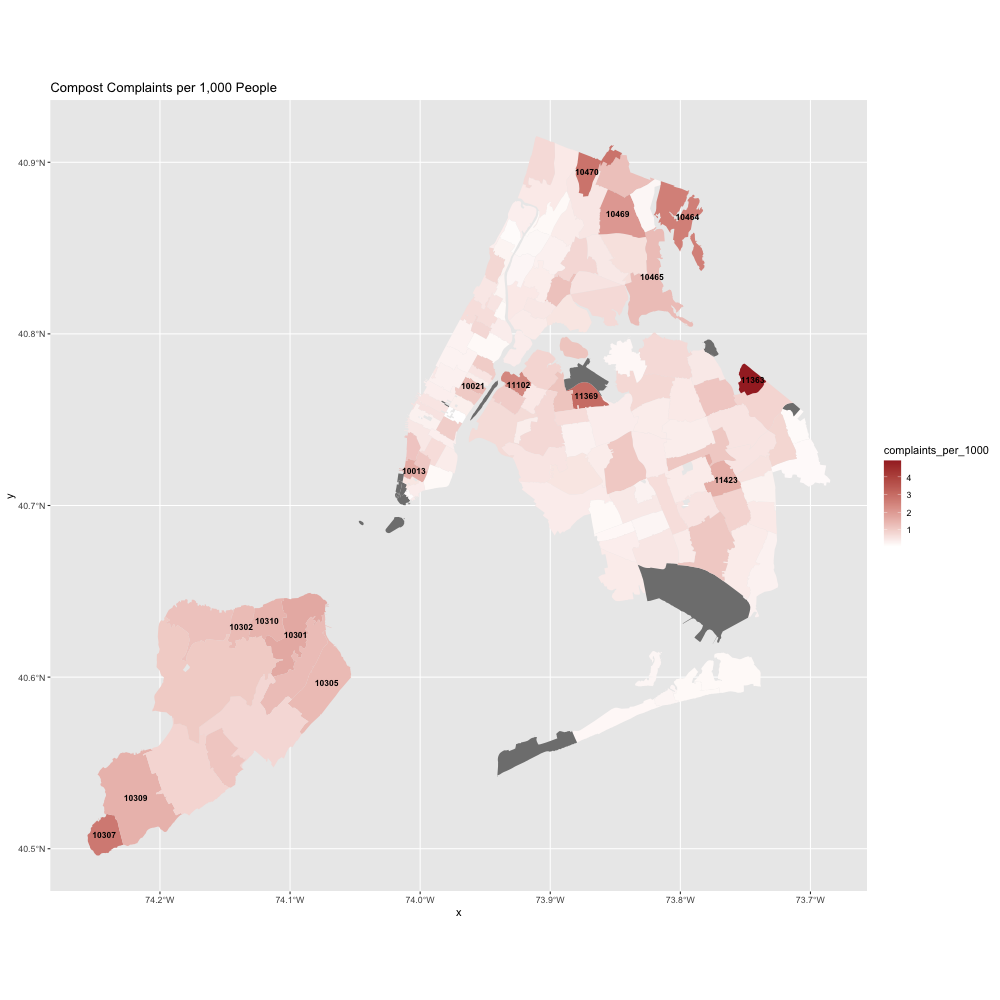

In [130]:
%%R -h 1000 -w 1000

library(ggplot2)

ggplot(merged_df_compost_requests) +
  geom_sf(aes(fill = complaints_per_1000), color = NA) +
  geom_sf_text(
    data = top_labels,
    aes(label = incident_zip),
    size = 3,
    color = "black",
    fontface = "bold"
  ) +
  scale_fill_gradient(low = "white", high = "brown") +
  labs(title = "Compost Complaints per 1,000 People")

### Areas of northeastern Bronx are among the zip codes with the highest per capita complaints about compost, as well as the whole of Staten Island

In [96]:
compost_pop.head()

,unique_key,created_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,status,community_board,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,resolution_description,resolution_action_updated_date,closed_date,facility_type,created_year,geoid,name,population
0,65267374,2025-06-15T01:18:52.000,DSNY,Department of Sanitation,Missed Collection,Compost,Street,10309,202 ADMIRALTY LOOP,ADMIRALTY LOOP,BEND,DEAD END,BEND,DEAD END,ADDRESS,STATEN ISLAND,ADMIRALTY LOOP,In Progress,03 STATEN ISLAND,5067270065,STATEN ISLAND,927798,127305,ONLINE,Unspecified,STATEN ISLAND,40.515918339918166,-74.20303101145603,"{'latitude': '40.515918339918166', 'longitude'...",NaN,NaN,NaN,NaN,2025,86000US10309,10309,34918.0
1,65262952,2025-06-14T23:34:49.000,DSNY,Department of Sanitation,Missed Collection,Compost,Street,11226,3009 CORTELYOU ROAD,CORTELYOU ROAD,NOSTRAND AVENUE,EAST 31 STREET,NOSTRAND AVENUE,EAST 31 STREET,ADDRESS,BROOKLYN,CORTELYOU ROAD,In Progress,17 BROOKLYN,3049300064,BROOKLYN,998490,174068,ONLINE,Unspecified,BROOKLYN,40.644441635858456,-73.9486868826923,"{'latitude': '40.644441635858456', 'longitude'...",NaN,NaN,NaN,NaN,2025,86000US11226,11226,100022.0
2,65268421,2025-06-14T20:44:20.000,DSNY,Department of Sanitation,Missed Collection,Compost,Street,10016,252 EAST 32 STREET,EAST 32 STREET,3 AVENUE,2 AVENUE,3 AVENUE,2 AVENUE,ADDRESS,NEW YORK,EAST 32 STREET,In Progress,06 MANHATTAN,1009120038,MANHATTAN,990615,210183,ONLINE,Unspecified,MANHATTAN,40.743578092381746,-73.97702991799225,"{'latitude': '40.743578092381746', 'longitude'...",NaN,NaN,NaN,NaN,2025,86000US10016,10016,54297.0
3,65267381,2025-06-14T19:43:09.000,DSNY,Department of Sanitation,Missed Collection,Compost,Street,11236,1036 RALPH AVENUE,RALPH AVENUE,EAST 88 STREET,AVENUE A,EAST 88 STREET,AVENUE A,ADDRESS,BROOKLYN,RALPH AVENUE,In Progress,17 BROOKLYN,3047310052,BROOKLYN,1006311,176044,PHONE,Unspecified,BROOKLYN,40.64984929808265,-73.92049785644882,"{'latitude': '40.64984929808265', 'longitude':...",NaN,NaN,NaN,NaN,2025,86000US11236,11236,95174.0
4,65268418,2025-06-14T19:39:08.000,DSNY,Department of Sanitation,Missed Collection,Compost,Street,11235,2830 BRIGHTON 3 STREET,BRIGHTON 3 STREET,SHORE PARKWAY,BRIGHTON 3 ROAD,SHORE PARKWAY,BRIGHTON 3 ROAD,ADDRESS,BROOKLYN,BRIGHTON 3 STREET,In Progress,13 BROOKLYN,3072607505,BROOKLYN,993809,151432,ONLINE,Unspecified,BROOKLYN,40.582316782730686,-73.9655866710303,"{'latitude': '40.582316782730686', 'longitude'...",NaN,NaN,NaN,NaN,2025,86000US11235,11235,81958.0


In [97]:
compost_pop['resolution_description'].value_counts()

resolution_description
The Department of Sanitation collected the requested items.                                                                                                                                                                         11644
The Department of Sanitation investigated this complaint and found no condition at the location.                                                                                                                                     6514
The Department of Sanitation mailed the literature. Please allow one week for delivery.                                                                                                                                              3089
The Department of Sanitation investigated and found this complaint to be out of jurisdiction. The Department of Sanitation reviewed this and found it not to be meeting the criteria for a complaint or service request.              501
The Department of Sanitation has investig

In [103]:
compost_pop.groupby('borough')['complaint_type'].value_counts()

borough        complaint_type                
BRONX          Missed Collection                 1515
               Literature Request                 337
BROOKLYN       Missed Collection                 9851
               Literature Request                1174
MANHATTAN      Missed Collection                 2313
               Literature Request                 327
               Residential Disposal Complaint       1
QUEENS         Missed Collection                 4546
               Literature Request                 951
               Residential Disposal Complaint       1
STATEN ISLAND  Missed Collection                  743
               Literature Request                 289
Unspecified    Literature Request                  11
               Missed Collection                    8
Name: count, dtype: int64

In [105]:
compost_pop.groupby('borough')['complaint_type'].value_counts(normalize=True)

borough        complaint_type                
BRONX          Missed Collection                 0.818035
               Literature Request                0.181965
BROOKLYN       Missed Collection                 0.893515
               Literature Request                0.106485
MANHATTAN      Missed Collection                 0.875805
               Literature Request                0.123817
               Residential Disposal Complaint    0.000379
QUEENS         Missed Collection                 0.826846
               Literature Request                0.172972
               Residential Disposal Complaint    0.000182
STATEN ISLAND  Missed Collection                 0.719961
               Literature Request                0.280039
Unspecified    Literature Request                0.578947
               Missed Collection                 0.421053
Name: proportion, dtype: float64

In [101]:
compost_pop[compost_pop['borough'] == 'BRONX'].groupby('incident_zip')['complaint_type'].value_counts()

incident_zip  complaint_type    
10451         Missed Collection      25
              Literature Request      4
10452         Missed Collection      23
              Literature Request     20
10453         Missed Collection      19
              Literature Request     10
10454         Missed Collection      23
              Literature Request      6
10455         Missed Collection      34
              Literature Request      3
10456         Missed Collection      35
              Literature Request     26
10457         Missed Collection      29
              Literature Request     16
10458         Missed Collection      43
              Literature Request     15
10459         Missed Collection      76
              Literature Request     13
10460         Missed Collection      58
              Literature Request      5
10461         Missed Collection      59
              Literature Request     28
10462         Missed Collection      44
              Literature Request     25
10463  

In [106]:
# Filter for Bronx
bronx_data = compost_pop[compost_pop['borough'] == 'BRONX']

# Group by ZIP and complaint_type, count complaints
complaint_counts = bronx_data.groupby(['incident_zip', 'complaint_type']).size().reset_index(name='complaint_count')

# Get population per ZIP (assuming population is the same for each row in a ZIP)
zip_population = bronx_data.groupby('incident_zip')['population'].first().reset_index()

# Merge complaint counts with population
complaints_with_pop = complaint_counts.merge(zip_population, on='incident_zip', how='left')

# Calculate complaints per person (or per 1000 people)
complaints_with_pop['complaints_per_1000'] = (complaints_with_pop['complaint_count'] / complaints_with_pop['population']) * 1000

# Show result
complaints_with_pop

,incident_zip,complaint_type,complaint_count,population,complaints_per_1000
0,10451,Literature Request,4,48975.0,0.081674
1,10451,Missed Collection,25,48975.0,0.510465
2,10452,Literature Request,20,76745.0,0.260603
3,10452,Missed Collection,23,76745.0,0.299694
4,10453,Literature Request,10,78270.0,0.127763
5,10453,Missed Collection,19,78270.0,0.242749
6,10454,Literature Request,6,40368.0,0.148633
7,10454,Missed Collection,23,40368.0,0.569758
8,10455,Literature Request,3,42940.0,0.069865
9,10455,Missed Collection,34,42940.0,0.791803


In [107]:
complaints_with_pop.sort_values(by='complaints_per_1000', ascending=False)

,incident_zip,complaint_type,complaint_count,population,complaints_per_1000
41,10471,Missed Collection,172,23400.0,7.350427
27,10464,Missed Collection,21,4273.0,4.914580
39,10470,Missed Collection,70,15558.0,4.499293
25,10463,Missed Collection,185,69373.0,2.666744
37,10469,Missed Collection,183,69855.0,2.619712
26,10464,Literature Request,10,4273.0,2.340276
31,10466,Missed Collection,143,74061.0,1.930841
29,10465,Missed Collection,75,46457.0,1.614396
17,10459,Missed Collection,76,49753.0,1.527546
21,10461,Missed Collection,59,50900.0,1.159136


## Getting income data from the census

In [146]:
income = pd.read_csv('acs2023_5yr_B19013_86000US10010.csv')

In [147]:
income.head()

,geoid,name,B19013001,"B19013001, Error"
0,16000US3651000,"New York, NY",79713.0,602.0
1,86000US07002,07002,81285.0,4763.0
2,86000US07008,07008,87712.0,10024.0
3,86000US07020,07020,137847.0,30960.0
4,86000US07024,07024,105594.0,5149.0


In [153]:
compost_pop_income = compost_pop.merge(income, left_on='incident_zip', right_on='name', how='left')

In [154]:
compost_pop_income.head()

,unique_key,created_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,status,community_board,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,resolution_description,resolution_action_updated_date,closed_date,facility_type,created_year,geoid_x,name_x,population,geoid_y,name_y,B19013001,"B19013001, Error"
0,65267374,2025-06-15T01:18:52.000,DSNY,Department of Sanitation,Missed Collection,Compost,Street,10309,202 ADMIRALTY LOOP,ADMIRALTY LOOP,BEND,DEAD END,BEND,DEAD END,ADDRESS,STATEN ISLAND,ADMIRALTY LOOP,In Progress,03 STATEN ISLAND,5067270065,STATEN ISLAND,927798,127305,ONLINE,Unspecified,STATEN ISLAND,40.515918339918166,-74.20303101145603,"{'latitude': '40.515918339918166', 'longitude'...",NaN,NaN,NaN,NaN,2025,86000US10309,10309,34918.0,86000US10309,10309,123638.0,19422.0
1,65262952,2025-06-14T23:34:49.000,DSNY,Department of Sanitation,Missed Collection,Compost,Street,11226,3009 CORTELYOU ROAD,CORTELYOU ROAD,NOSTRAND AVENUE,EAST 31 STREET,NOSTRAND AVENUE,EAST 31 STREET,ADDRESS,BROOKLYN,CORTELYOU ROAD,In Progress,17 BROOKLYN,3049300064,BROOKLYN,998490,174068,ONLINE,Unspecified,BROOKLYN,40.644441635858456,-73.9486868826923,"{'latitude': '40.644441635858456', 'longitude'...",NaN,NaN,NaN,NaN,2025,86000US11226,11226,100022.0,86000US11226,11226,81084.0,4067.0
2,65268421,2025-06-14T20:44:20.000,DSNY,Department of Sanitation,Missed Collection,Compost,Street,10016,252 EAST 32 STREET,EAST 32 STREET,3 AVENUE,2 AVENUE,3 AVENUE,2 AVENUE,ADDRESS,NEW YORK,EAST 32 STREET,In Progress,06 MANHATTAN,1009120038,MANHATTAN,990615,210183,ONLINE,Unspecified,MANHATTAN,40.743578092381746,-73.97702991799225,"{'latitude': '40.743578092381746', 'longitude'...",NaN,NaN,NaN,NaN,2025,86000US10016,10016,54297.0,86000US10016,10016,153065.0,17848.0
3,65267381,2025-06-14T19:43:09.000,DSNY,Department of Sanitation,Missed Collection,Compost,Street,11236,1036 RALPH AVENUE,RALPH AVENUE,EAST 88 STREET,AVENUE A,EAST 88 STREET,AVENUE A,ADDRESS,BROOKLYN,RALPH AVENUE,In Progress,17 BROOKLYN,3047310052,BROOKLYN,1006311,176044,PHONE,Unspecified,BROOKLYN,40.64984929808265,-73.92049785644882,"{'latitude': '40.64984929808265', 'longitude':...",NaN,NaN,NaN,NaN,2025,86000US11236,11236,95174.0,86000US11236,11236,82813.0,2976.0
4,65268418,2025-06-14T19:39:08.000,DSNY,Department of Sanitation,Missed Collection,Compost,Street,11235,2830 BRIGHTON 3 STREET,BRIGHTON 3 STREET,SHORE PARKWAY,BRIGHTON 3 ROAD,SHORE PARKWAY,BRIGHTON 3 ROAD,ADDRESS,BROOKLYN,BRIGHTON 3 STREET,In Progress,13 BROOKLYN,3072607505,BROOKLYN,993809,151432,ONLINE,Unspecified,BROOKLYN,40.582316782730686,-73.9655866710303,"{'latitude': '40.582316782730686', 'longitude'...",NaN,NaN,NaN,NaN,2025,86000US11235,11235,81958.0,86000US11235,11235,61689.0,3210.0


In [155]:
compost_pop_income['income'] = compost_pop_income['B19013001']

In [161]:
#compost_pop_income = compost_pop_income.drop(columns={'B19013001','B19013001, Error'})

In [162]:
compost_pop_income = compost_pop_income.drop(columns={'geoid_x','name_x','name_y','geoid_y'})

In [163]:
compost_pop_income.head()

,unique_key,created_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,status,community_board,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,resolution_description,resolution_action_updated_date,closed_date,facility_type,created_year,population,income
0,65267374,2025-06-15T01:18:52.000,DSNY,Department of Sanitation,Missed Collection,Compost,Street,10309,202 ADMIRALTY LOOP,ADMIRALTY LOOP,BEND,DEAD END,BEND,DEAD END,ADDRESS,STATEN ISLAND,ADMIRALTY LOOP,In Progress,03 STATEN ISLAND,5067270065,STATEN ISLAND,927798,127305,ONLINE,Unspecified,STATEN ISLAND,40.515918339918166,-74.20303101145603,"{'latitude': '40.515918339918166', 'longitude'...",NaN,NaN,NaN,NaN,2025,34918.0,123638.0
1,65262952,2025-06-14T23:34:49.000,DSNY,Department of Sanitation,Missed Collection,Compost,Street,11226,3009 CORTELYOU ROAD,CORTELYOU ROAD,NOSTRAND AVENUE,EAST 31 STREET,NOSTRAND AVENUE,EAST 31 STREET,ADDRESS,BROOKLYN,CORTELYOU ROAD,In Progress,17 BROOKLYN,3049300064,BROOKLYN,998490,174068,ONLINE,Unspecified,BROOKLYN,40.644441635858456,-73.9486868826923,"{'latitude': '40.644441635858456', 'longitude'...",NaN,NaN,NaN,NaN,2025,100022.0,81084.0
2,65268421,2025-06-14T20:44:20.000,DSNY,Department of Sanitation,Missed Collection,Compost,Street,10016,252 EAST 32 STREET,EAST 32 STREET,3 AVENUE,2 AVENUE,3 AVENUE,2 AVENUE,ADDRESS,NEW YORK,EAST 32 STREET,In Progress,06 MANHATTAN,1009120038,MANHATTAN,990615,210183,ONLINE,Unspecified,MANHATTAN,40.743578092381746,-73.97702991799225,"{'latitude': '40.743578092381746', 'longitude'...",NaN,NaN,NaN,NaN,2025,54297.0,153065.0
3,65267381,2025-06-14T19:43:09.000,DSNY,Department of Sanitation,Missed Collection,Compost,Street,11236,1036 RALPH AVENUE,RALPH AVENUE,EAST 88 STREET,AVENUE A,EAST 88 STREET,AVENUE A,ADDRESS,BROOKLYN,RALPH AVENUE,In Progress,17 BROOKLYN,3047310052,BROOKLYN,1006311,176044,PHONE,Unspecified,BROOKLYN,40.64984929808265,-73.92049785644882,"{'latitude': '40.64984929808265', 'longitude':...",NaN,NaN,NaN,NaN,2025,95174.0,82813.0
4,65268418,2025-06-14T19:39:08.000,DSNY,Department of Sanitation,Missed Collection,Compost,Street,11235,2830 BRIGHTON 3 STREET,BRIGHTON 3 STREET,SHORE PARKWAY,BRIGHTON 3 ROAD,SHORE PARKWAY,BRIGHTON 3 ROAD,ADDRESS,BROOKLYN,BRIGHTON 3 STREET,In Progress,13 BROOKLYN,3072607505,BROOKLYN,993809,151432,ONLINE,Unspecified,BROOKLYN,40.582316782730686,-73.9655866710303,"{'latitude': '40.582316782730686', 'longitude'...",NaN,NaN,NaN,NaN,2025,81958.0,61689.0


In [164]:
compost_pop_income.to_csv('compost_complaints_pop_income.csv',index=False)

## Aggregating this dataframe

In [221]:
compost_pop_income = compost_pop_income[compost_pop_income['created_year'] == '2025']

In [222]:
compost_pop_income['complaint_type'].value_counts()

complaint_type
Missed Collection                 5909
Residential Disposal Complaint       2
Name: count, dtype: int64

In [223]:
compost_pop_income['created_date'] = pd.to_datetime(compost_pop_income['created_date'])
compost_pop_income['resolution_action_updated_date'] = pd.to_datetime(compost_pop_income['resolution_action_updated_date'])

In [224]:
compost_pop_income['resolution_time_days'] = (
    compost_pop_income['resolution_action_updated_date'] - compost_pop_income['created_date']
).dt.total_seconds() / (60 * 60 * 24)

In [225]:
grouped = compost_pop_income.groupby('incident_zip')

In [226]:
summary = compost_pop_income.groupby('incident_zip').agg(
    borough=('borough', 'first'),
    complaint_count=('unique_key', 'count'),
    avg_resolution_days=('resolution_time_days', 'mean'),
    median_resolution_days=('resolution_time_days', 'median'),
    population=('population', 'first'),
    income=('income', 'first')  # or 'median_income', if that's your column name
)

In [227]:
final_summary = summary.join(missed_times).join(lit_times).reset_index()

In [228]:
final_summary['complaints_per_1000'] = final_summary['complaint_count'] / final_summary['population']

In [229]:
final_summary.head()

,incident_zip,borough,complaint_count,avg_resolution_days,median_resolution_days,population,income,missed_avg_days,missed_median_days,lit_avg_days,lit_median_days,complaints_per_1000
0,10001,MANHATTAN,9,0.917753,0.682708,29079.0,123393.0,0.917753,0.682708,NaN,NaN,0.000310
1,10002,MANHATTAN,13,1.428262,1.085637,75517.0,46525.0,1.428262,1.085637,NaN,NaN,0.000172
2,10003,MANHATTAN,37,0.795554,0.845579,53825.0,153750.0,0.795554,0.845579,NaN,NaN,0.000687
3,10005,MANHATTAN,1,1.084282,1.084282,9238.0,211810.0,1.084282,1.084282,NaN,NaN,0.000108
4,10007,MANHATTAN,4,1.936377,1.670885,7802.0,250001.0,1.936377,1.670885,NaN,NaN,0.000513


In [230]:
final_summary.to_csv('compost_complaints_25_aggregation_pop_income.csv',index=False)

In [234]:
final_summary.groupby('borough')['complaints_per_1000'].median().sort_values()

borough
MANHATTAN        0.000394
QUEENS           0.000453
BRONX            0.000498
BROOKLYN         0.000709
STATEN ISLAND    0.001315
Name: complaints_per_1000, dtype: float64

### Staten Island on the whole makes the most complaints per capita

In [235]:
final_summary.groupby('borough')['complaints_per_1000'].mean().sort_values()

borough
MANHATTAN        0.000529
QUEENS           0.000674
BRONX            0.000792
BROOKLYN         0.000827
STATEN ISLAND    0.001362
Name: complaints_per_1000, dtype: float64

In [231]:
final_summary.groupby('borough')['median_resolution_days'].median()

borough
BRONX            0.854931
BROOKLYN         0.784031
MANHATTAN        0.882581
QUEENS           0.944363
STATEN ISLAND    0.997642
Name: median_resolution_days, dtype: float64

In [244]:
final_summary.groupby('borough')['avg_resolution_days'].median()

borough
BRONX            0.675406
BROOKLYN         0.783709
MANHATTAN        0.949373
QUEENS           1.091299
STATEN ISLAND    0.945401
Name: avg_resolution_days, dtype: float64

### Response time is slowest in Staten Island

In [240]:
final_summary.groupby('borough')['avg_resolution_days'].median()

borough
BRONX            0.675406
BROOKLYN         0.783709
MANHATTAN        0.949373
QUEENS           1.091299
STATEN ISLAND    0.945401
Name: avg_resolution_days, dtype: float64

In [238]:
final_summary[final_summary['incident_zip'] == '11363']

,incident_zip,borough,complaint_count,avg_resolution_days,median_resolution_days,population,income,missed_avg_days,missed_median_days,lit_avg_days,lit_median_days,complaints_per_1000
131,11363,QUEENS,37,1.102731,0.9511,7515.0,110833.0,1.102731,0.9511,NaN,NaN,0.004923


## EDA in R

In [204]:
%%R

df <- read.csv('compost_complaints_25_aggregation_pop_income.csv')

In [205]:
%%R

colnames(df)

 [1] "incident_zip"           "borough"                "complaint_count"       
 [4] "avg_resolution_days"    "median_resolution_days" "population"            
 [7] "income"                 "pct_missed_collection"  "pct_literature_request"
[10] "missed_avg_days"        "missed_median_days"     "lit_avg_days"          
[13] "lit_median_days"        "complaints_per_1000"   


In [206]:
%%R

library(ggplot2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


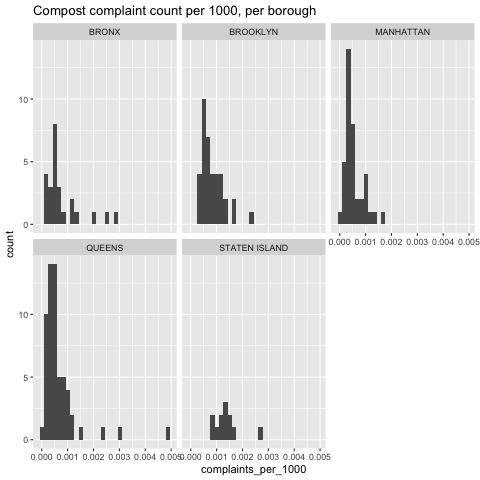

In [207]:
%%R

ggplot(df) +
  aes(x = complaints_per_1000) + 
  geom_histogram() +
  facet_wrap(~borough) +
  labs(title = "Compost complaint count per 1000, per borough")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


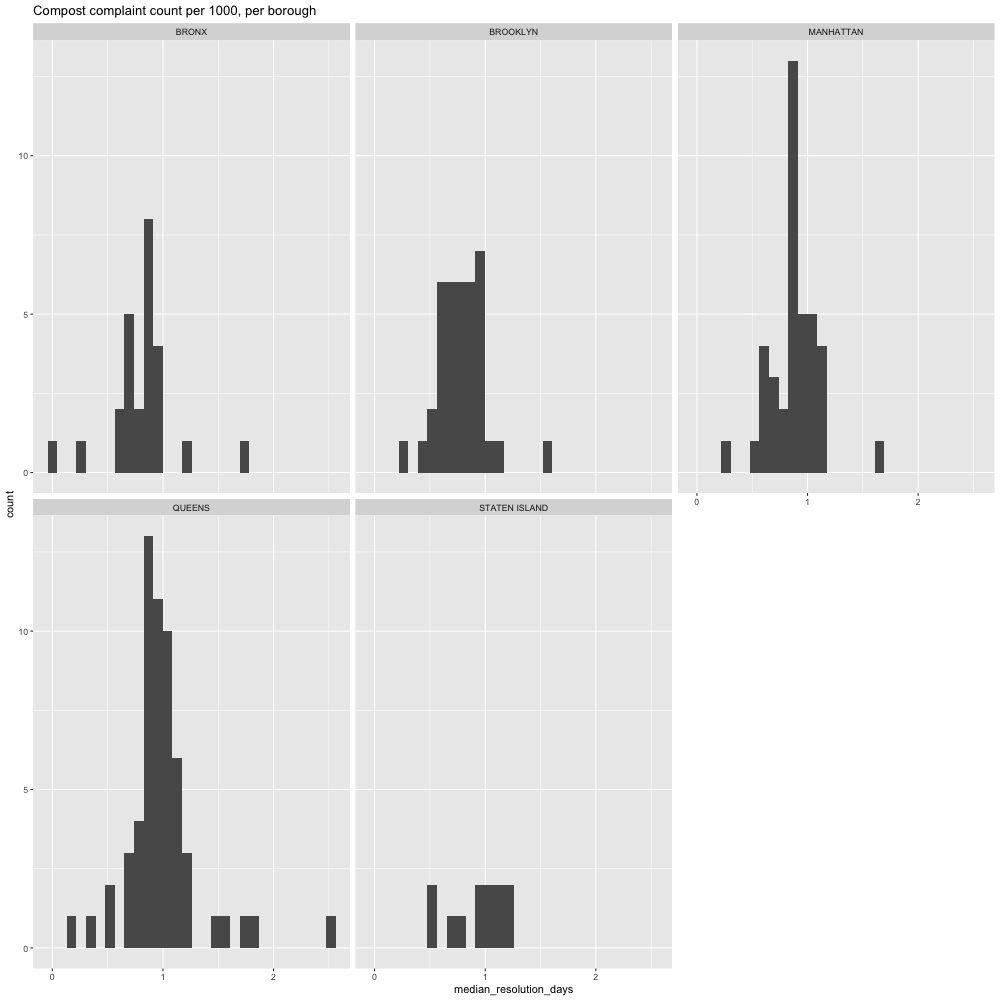

In [216]:
%%R -h 1000 -w 1000

ggplot(df) +
  aes(x = median_resolution_days) + 
  geom_histogram() +
  facet_wrap(~borough) +
  labs(title = "Compost complaint count per 1000, per borough")

`geom_smooth()` using formula = 'y ~ x'


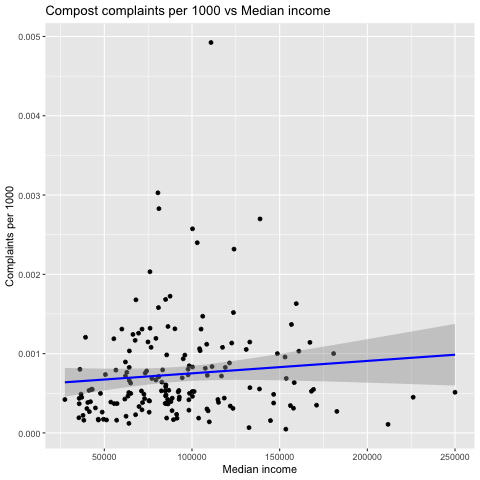

In [208]:
%%R

ggplot(df) +
  aes(x = income, y = complaints_per_1000) + 
  geom_point() +
  geom_smooth(method = "lm", se = TRUE, color = "blue") +
  labs(title = "Compost complaints per 1000 vs Median income",
       x = "Median income",
       y = "Complaints per 1000")

### Higher income areas tend to make slightly more complaints (could be explained especially by Staten Island)

`geom_smooth()` using formula = 'y ~ x'


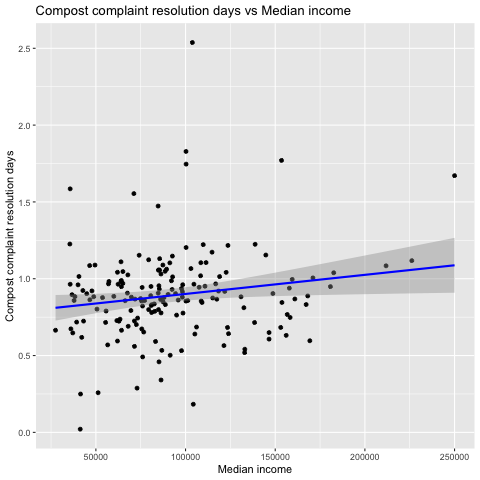

In [209]:
%%R

ggplot(df) +
  aes(x = income, y = median_resolution_days) + 
  geom_point() +
  geom_smooth(method = "lm", se = TRUE, color = "blue") +
  labs(title = "Compost complaint resolution days vs Median income",
       x = "Median income",
       y = "Compost complaint resolution days")

In [210]:
%%R

require('tidyverse')
require('DescTools')

Loading required package: DescTools


In [211]:
%%R 
model <- lm(complaints_per_1000 ~ income, data=df)
summary(model)


Call:
lm(formula = complaints_per_1000 ~ income, data = df)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0008181 -0.0003532 -0.0001991  0.0001838  0.0041549 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.953e-04  1.216e-04   4.896 2.25e-06 ***
income      1.563e-09  1.213e-09   1.289    0.199    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0006249 on 171 degrees of freedom
Multiple R-squared:  0.009622,	Adjusted R-squared:  0.003831 
F-statistic: 1.661 on 1 and 171 DF,  p-value: 0.1992



### Number of complaints is not statistically significant with income

In [212]:
%%R 
model <- lm(median_resolution_days ~ income, data=df)
summary(model)


Call:
lm(formula = median_resolution_days ~ income, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.80720 -0.13004 -0.00211  0.11910  1.63184 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.766e-01  5.582e-02  13.913   <2e-16 ***
income      1.244e-06  5.567e-07   2.234   0.0268 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2868 on 171 degrees of freedom
Multiple R-squared:  0.02836,	Adjusted R-squared:  0.02268 
F-statistic: 4.991 on 1 and 171 DF,  p-value: 0.02677

